In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load datasets

fg_df = pd.read_csv(r'C:\Users\boney\OneDrive\Desktop\Trader Behavior & Market Analysis\fear_greed_index.csv')
hd_df = pd.read_csv(r'C:\Users\boney\OneDrive\Desktop\Trader Behavior & Market Analysis\historical_data.csv')

In [4]:
# strutural view
print(fg_df.head())
print(hd_df.head())

    timestamp  value classification      date
0  1517463000     30           Fear  2-1-2018
1  1517549400     15   Extreme Fear  2-2-2018
2  1517635800     40           Fear  2-3-2018
3  1517722200     24   Extreme Fear  2-4-2018
4  1517808600     11   Extreme Fear  2-5-2018
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY    12-02-2024        0.000000       Buy   
1        16.00    127.68  BUY    12-02-2024      986.524596       Buy   
2       144.09   1150.63  BUY    12-02-2024     1002.518996       Buy   

In [5]:
# summary
print(fg_df.info())
print(hd_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 n

In [6]:
# Clean column names
hd_df.columns = hd_df.columns.str.strip().str.lower().str.replace(' ', '_')
# fg_df is already has clean name

In [7]:
# renaimg the col name
hd_df.rename(columns={'Timestamp IST': 'date'}, inplace=True)

In [8]:
# convet timestamp_ist to date
fg_df['date'] = pd.to_datetime(fg_df['date']).dt.date
hd_df['date'] = pd.to_datetime(hd_df['timestamp_ist']).dt.date

In [9]:
print(fg_df.head(1))
print(hd_df.head(1))

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
                                      account  coin  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   

   size_tokens  size_usd side timestamp_ist  start_position direction  \
0       986.87   7872.16  BUY    12-02-2024             0.0       Buy   

   closed_pnl                                   transaction_hash     order_id  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   crossed       fee      trade_id     timestamp        date  
0     True  0.345404  8.950000e+14  1.730000e+12  2024-12-02  


In [10]:
#merge datasets
merged_df = pd.merge(hd_df, fg_df[['date', 'classification']], on='date', how='left')
merged_df.head(2)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,12-02-2024,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,12-02-2024,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed


In [11]:
#profit
merged_df['profit'] = merged_df['closed_pnl'] > 0

In [12]:
performance_df = merged_df.groupby(['account', 'classification']).agg({
    'closed_pnl' : 'sum',
    'size_tokens' : 'sum',
    'profit' : 'mean'
}).reset_index()

In [13]:
# rename for clarity

performance_df.rename(columns={
    'closed_pnl' : 'total_pnl',
    'size_tokens' : 'total_size'
}, inplace=True)

In [14]:
performance_df.head(1)

,account,classification,total_pnl,total_size,profit
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,124769.221441,659.3362,0.37


In [15]:
# average profit n loss by sentiment
sentiment_pnl = performance_df.groupby('classification') ['total_pnl'].mean().reset_index() 

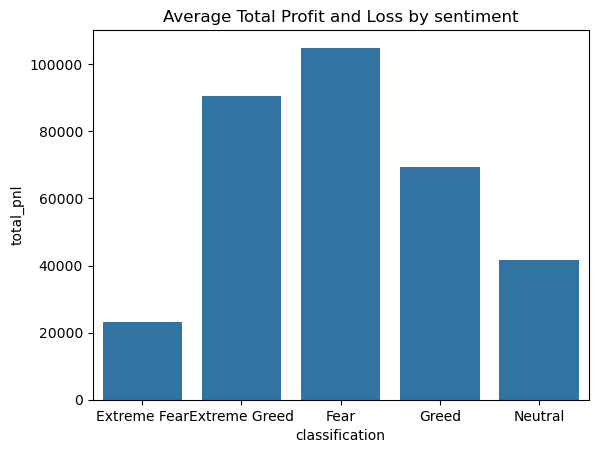

In [16]:
sns.barplot(data = sentiment_pnl, x = 'classification', y = 'total_pnl')
plt.title("Average Total Profit and Loss by sentiment")
plt.show()

In [18]:
# average profit by sentiment
sentiment_profit = performance_df.groupby('classification')['profit'].mean().reset_index() 

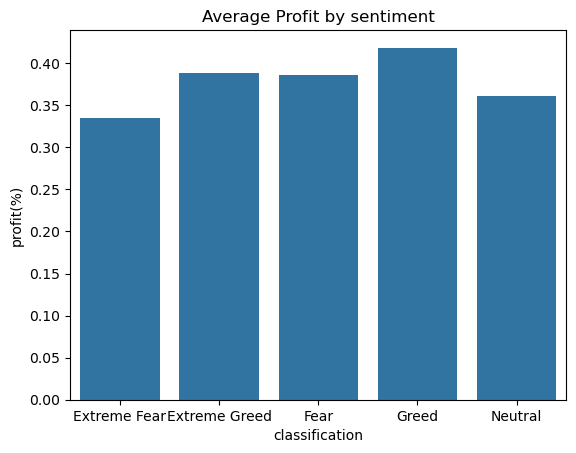

In [22]:
sns.barplot(data = sentiment_profit, x = 'classification', y = 'profit')
plt.title("Average Profit by sentiment")
plt.ylabel("profit(%)")
plt.show()

In [24]:
# average trade size by sentiment
sentiment_size = performance_df.groupby('classification')['total_size'].mean().reset_index()

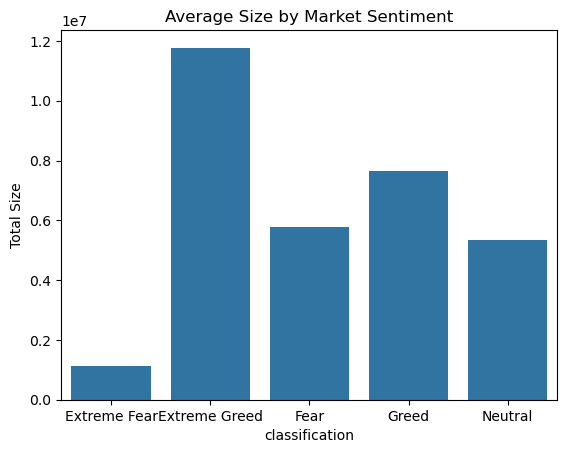

In [27]:
sns.barplot(data=sentiment_size, x='classification', y='total_size')
plt.title("Average Size by Market Sentiment")
plt.ylabel("Total Size")
plt.show()